## Project

**Group Member**
1. Amir Firdaus       (A18CS0027)
2. Aiman Shaquan      (A18CS0021)
3. Ahmad Syamil Aiman (A18CS0019)


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as iskay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [3]:
# View anime table
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# View rating table
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


**Data Cleaning**

In [5]:
# Check for null in anime table
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
# Check for null in rating table
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [7]:
# Drop null value from anime table
anime= anime.dropna()
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [8]:
# Drop unknown value from anime table
unknown = anime[anime['episodes']=='Unknown'].index
new_data = anime.drop(unknown)
new_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [9]:
#Merge two data 
mergedata = pd.merge(new_data,rating,on=['anime_id','anime_id'])
mergedata

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813602,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813603,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813604,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813605,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [10]:
#since both table have column name rating, when merge it show as rating_x and rating_y
#here we change the column name

mergedata = mergedata.rename(columns={'rating_x':'rating_anime','rating_y':'rating_user'})
mergedata

,anime_id,name,genre,type,episodes,rating_anime,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813602,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813603,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813604,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813605,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [11]:
#Sort data by episodes and members
mergedata = mergedata.sort_values(by=['episodes','members'],ascending = True)
mergedata

,anime_id,name,genre,type,episodes,rating_anime,members,user_id,rating_user
7687556,33858,Kissaten Soudou,Comedy,ONA,1,3.46,34,53492,3
7688221,33174,Nori P-chan,"Kids, Slice of Life",OVA,1,4.10,35,12431,3
7687320,33868,Kabi Usagi: Kaichuu,Comedy,ONA,1,4.17,36,53492,3
7685913,33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37,48766,-1
7686541,34119,Escalator-jou no Hokou no Kiken-sei,Drama,Special,1,3.33,37,49662,5
...,...,...,...,...,...,...,...,...,...
508142,12431,Uchuu Kyoudai,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",TV,99,8.59,72958,72791,-1
508143,12431,Uchuu Kyoudai,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",TV,99,8.59,72958,72863,9
508144,12431,Uchuu Kyoudai,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",TV,99,8.59,72958,73111,8
508145,12431,Uchuu Kyoudai,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",TV,99,8.59,72958,73257,8


In [12]:
#get the full list of all genre in the genre column

genres = ''
for genre in new_data['genre'].to_list():
    genres += str(genre) + ', '

In [13]:
#Seperate all the list by ,
list_genres = genres.split(', ')
genres =  genres.split(', ')

In [14]:
# remove duplicate in the list
genres = set(genres)

In [16]:
genres.remove('')
genres

{'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri'}

**Data Aggregation and Group operation**

In [17]:
rating_count = new_data['rating'].groupby(new_data['type'])
rating_count = rating_count.agg([('Minimum','min'),('Maximum','max'),('Average','mean'),('Count','count')])
rating_count

,Minimum,Maximum,Average,Count
type,,,,
Movie,1.92,10.00,6.334486,2258
Music,3.28,8.38,5.588665,487
ONA,2.67,8.26,5.640479,606
OVA,2.00,9.25,6.371087,3246
Special,1.67,8.66,6.525453,1665
TV,3.00,9.26,6.929487,3568


In [19]:
member_count = mergedata['members'].groupby(mergedata['type'])
member_count = member_count.agg([('Minimum','min'),('Maximum','max'),('Average','mean')])
member_count

,Minimum,Maximum,Average
type,,,
Movie,40,466254,106502.127929
Music,55,71136,15204.001170
ONA,31,144898,44711.133037
OVA,35,305165,44079.750257
Special,34,160423,42460.284575
TV,29,1013917,230926.514012


In [20]:
genres_count = []
for genre in genres:
        gen = genre,list_genres.count(genre)
        genres_count.append(gen)
genres_count
df = pd.DataFrame(genres_count,columns=['Genre','Count'])
df.set_index('Genre',inplace = True)
df

,Count
Genre,
Vampire,100
Romance,1436
Mecha,927
Magic,742
Samurai,145
Mystery,482
Super Power,445
Psychological,226
Historical,787


**Data Visualization**

Text(0, 0.5, 'Count')

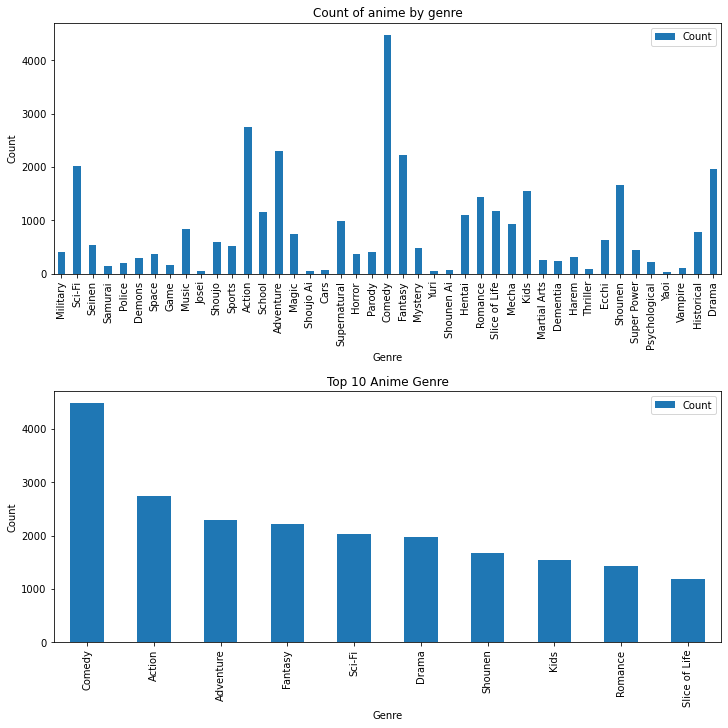

In [54]:
topgenredf = df.sort_values(by=['Count'],ascending=False)[:10]c
fig, axes = plt.subplots(2, 1, figsize=(10,10), constrained_layout = True)
df.plot.bar(ax=axes[0]) # count of anime genre
axes[0].set_title("Count of anime by genre")
axes[0].set_ylabel("Count")
print("\n")
topgenredf.plot.bar(ax=axes[1]) # top 10 anime genre
axes[1].set_title("Top 10 Anime Genre")
axes[1].set_ylabel("Count")

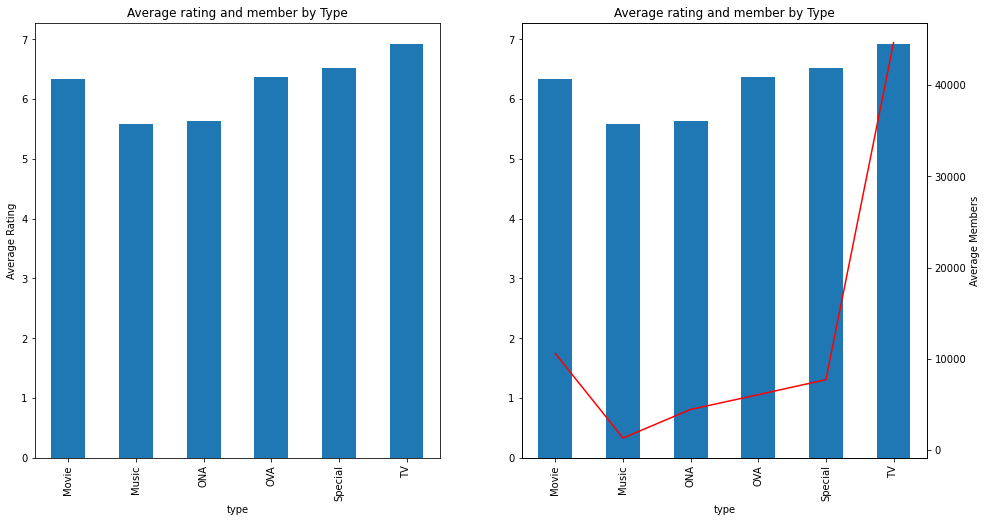

In [73]:
fig, axes = plt.subplots(1,2,figsize=(16,8))
rating_count['Average'].plot.bar(ax=axes[0]) # average rating of anime by type
axes[0].set_title("Average rating and member by Type")
axes[0].set_ylabel("Average Rating")

rating_count['Average'].plot.bar(ax=axes[1]) # average rating of anime by type
axes[1] = axes[1].twinx()
axes[1].set_ylabel("Average Members")
axes[1].set_title("Average rating and member by Type")
member_count['Average'].plot.line(ax=axes[1], color = 'r') # average member of anime type


In [23]:
topanimedf = pd.DataFrame(new_data,columns=['name','members'])
topanimedf.set_index('name',inplace = True)
topanimedf

,members
name,
Kimi no Na wa.,200630
Fullmetal Alchemist: Brotherhood,793665
Gintama°,114262
Steins;Gate,673572
Gintama&#039;,151266
...,...
Toushindai My Lover: Minami tai Mecha-Minami,211
Under World,183
Violence Gekiga David no Hoshi,219


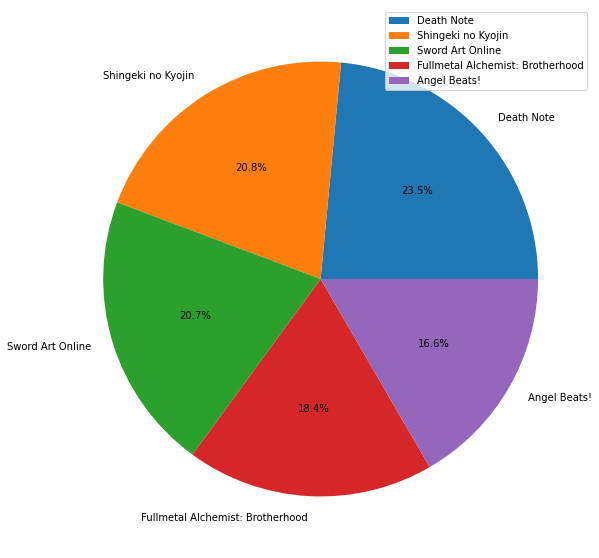

In [24]:
topanime = topanimedf.sort_values(by=['members'],ascending=False)[:5]
labels = topanime.index.to_list()
plt.figure(figsize=(10,10))
plt.pie(topanime['members'], labels=labels,autopct='%1.1f%%')
_ = plt.legend(labels)

**Machine Learning**

In [47]:
user_anime = pd.crosstab(mergedata['user_id'][:1000000], mergedata['name'])
user_anime.head(10)

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,...,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies 2 Episode 0,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,lilac (bombs Jun Togawa),makemagic,"on-chan, Yume Power Daibouken!",vivi,xxxHOLiC Movie: Manatsu no Yoru no Yume,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#initialize cluster centroid

pca = iskay(n_components=4)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [49]:
#Partitioning step

cluster = pd.DataFrame(pca_samples)
cluster.head()

,0,1,2,3
0,-0.103355,0.516484,-0.324519,-0.712495
1,-0.204985,-0.240939,0.167982,-0.533940
2,-0.626363,-0.068026,-0.000663,-0.011728
3,1.298075,0.525123,-0.803684,-1.252583
4,-0.522614,0.040540,-0.025658,-0.078339


In [50]:
#Update cluster centroid

tocluster = pd.DataFrame(cluster[[0,1,2,3]])

In [51]:
clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-0.31074947  0.08727399 -0.0248187   0.03283172]
 [ 1.90429582 -2.26552767 -0.81874117 -0.16413395]
 [ 3.62723073  2.04984476 -0.74068515 -0.1515506 ]
 [ 1.36383163 -0.0901378   2.06945413 -0.3444938 ]]


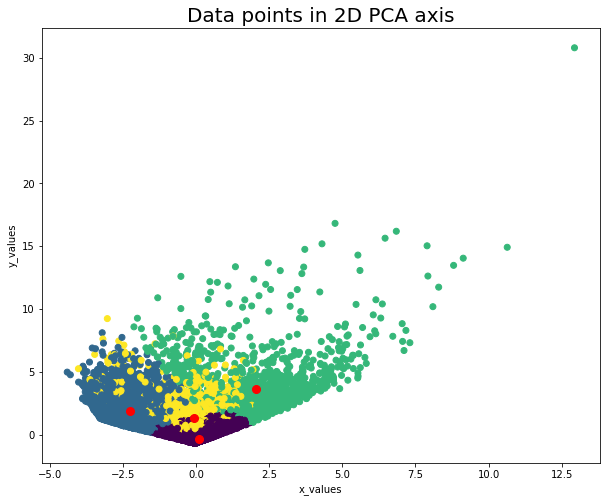

In [52]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [54]:
user_anime['cluster'] = c_preds


user_anime.head(10)

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,...,fake!fake!,gdgd Fairies 2 Episode 0,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,lilac (bombs Jun Togawa),makemagic,"on-chan, Yume Power Daibouken!",vivi,xxxHOLiC Movie: Manatsu no Yoru no Yume,◯,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [56]:
c0.sort_values(ascending=False)[0:15]

name
Final Fantasy: The Spirits Within                                             0.063580
Cardcaptor Sakura Movie 1                                                     0.053480
InuYasha: Kagami no Naka no Mugenjo                                           0.052301
Appleseed (Movie)                                                             0.049877
Final Fantasy VII: Last Order                                                 0.048764
InuYasha: Toki wo Koeru Omoi                                                  0.047874
Love Hina Christmas Special: Silent Eve                                       0.047229
Kanojo to Kanojo no Neko                                                      0.047162
Juubee Ninpuuchou                                                             0.046984
Naruto: Takigakure no Shitou - Ore ga Eiyuu Dattebayo!                        0.046206
Kuroshitsuji Special                                                          0.046095
Boku no Pico                          

In [63]:
c1.sort_values(ascending=False)[0:15]

name
Dragon Ball Z Movie 06: Gekitotsu!! 100-oku Power no Senshi-tachi                          0.938197
Dragon Ball Z Movie 07: Kyokugen Battle!! Sandai Super Saiyajin                            0.921648
Dragon Ball Z Movie 10: Kiken na Futari! Super Senshi wa Nemurenai                         0.914894
Dragon Ball Z Movie 01: Ora no Gohan wo Kaese!!                                            0.899696
Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta                               0.898683
Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu                         0.894630
Dragon Ball Z Movie 04: Super Saiyajin da Son Gokuu                                        0.894292
Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsuyoi Yatsu                                    0.886187
Dragon Ball Z Movie 11: Super Senshi Gekiha!! Katsu no wa Ore da                           0.865924
Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru                  0.85

In [64]:
c2.sort_values(ascending=False)[0:15]

name
IS: Infinite Stratos Encore - Koi ni Kogareru Rokujuusou                      0.534388
Toaru Kagaku no Railgun: Misaka-san wa Ima Chuumoku no Mato desukara          0.453920
Zero no Tsukaima: Princesses no Rondo - Yuuwaku no Sunahama                   0.441541
Toaru Majutsu no Index: Endymion no Kiseki                                    0.438102
Fate/Prototype                                                                0.435351
Full Metal Panic! The Second Raid: Wari to Hima na Sentaichou no Ichinichi    0.426410
Kore wa Zombie Desu ka? of the Dead OVA                                       0.424347
Guilty Crown: Lost Christmas                                                  0.416094
Break Blade 2: Ketsubetsu no Michi                                            0.414030
Denpa Onna to Seishun Otoko Special                                           0.403714
Break Blade 3: Kyoujin no Ato                                                 0.396836
Mondaiji-tachi ga Isekai kara Kuru Sou

In [65]:
c3.sort_values(ascending=False)[0:15]

name
One Piece Movie 1                                                              0.687276
One Piece Movie 4: Dead End no Bouken                                          0.673387
One Piece Movie 2: Nejimaki-jima no Daibouken                                  0.663530
One Piece Movie 3: Chinjuu-jima no Chopper Oukoku                              0.658602
One Piece Movie 5: Norowareta Seiken                                           0.642025
One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima                       0.634857
One Piece Movie 7: Karakuri-jou no Mecha Kyohei                                0.609767
One Piece Movie 8: Episode of Alabasta - Sabaku no Oujo to Kaizoku-tachi       0.524194
One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura    0.491039
One Piece: Yume no Soccer Ou!                                                  0.426075
One Piece: Jango no Dance Carnival                                             0.400986
One Piece: Mezase! Kaizoku 